In [ ]:
# Ryan Benac and Amy Neway

**Resources and Data**

[Earthquake data site](https://earthquake.usgs.gov/earthquakes/search/)

[Data (Earthquakes from the West Coast of the US, 4.5+ magnitude, from 2000 through current date)](https://drive.google.com/file/d/1Rk0_QaXgW_RaCKAkjshjwkvfEVkn8qy6/view?usp=sharing)

[Map link](https://drive.google.com/file/d/19o2yQ0r2yTCHgdj9lbTsEpViHTYq4TXE/view?usp=sharing)

[Column Meanings](https://earthquake.usgs.gov/earthquakes/feed/v1.0/csv.php)

[Map area chosen](https://docs.google.com/document/d/135V84UGW7GEGvTlqkCGn1b50OdF7bX4V29U06nLFas8/edit?usp=sharing)

[All other resources / sources](https://docs.google.com/document/d/1wHOAUyEuTk7v6UBPa7ZUB2rfT_-YtZebWGg2ndz-TXw/edit?usp=sharing) 

###**1. Business Understanding (Geology 101 and Plate Tectonics Crash Course)**

In [ ]:
# Ryan talks

Plate Tectonics

The Earth's surface (crust) is basically a bunch of masses that are constantly moving and interacting with one another. It's not as simple as just "they're moving around". Not only are they moving, but they are moving at different speeds relative to things around it and/or how fast the crust is being created. Further, they are interacting with one another is various ways. Here is the [current plate boundaries](https://www.learner.org/wp-content/interactive/dynamicearth/tectonicsmap/index.html) and how they interact with one another.



Relative plate motions
Everything is moving in different directions at various speeds. [Pangea to today](http://geologylearn.blogspot.com/2016/02/what-drives-plate-motion-and-how-fast.html)



These plate movements are what cause earthquakes! As the plates move, they don't always move in a smooth movement. They often are able to where crust is being created (MOR), but frequently they don't. California for example has a plate boundary running along the coast and partially through the state called the San Andreas Fault. This is largely an example of a transform plate boundary where the plates moe next to each other. As they move, the land resists, thus building up energy and strain. The "earthquake" that is felt is a sudden release of this energy and the crust gives way in the movement of plate direction. It causes a violent shaking of the ground often resulting in urban destruction, land deformation, tsunamis, landslides, and other dangerous events. 

What if we could predict when these earthquakes could occur? Specifically, what if we could pinpoint where the next earthquake focal point will be and what magnitude it will be? This would give communities time to prepare for such an event. It could also influence premeditated efforts to protect against earthquakes such as sturdier buildings and levees to control and mitigate tsunamis. There would be countless benefits if we were able to predict a major earthquake before it happened, or even if we can better understand the patterns and probabilities of earthquakes.

This may be tricky however because there are countless variabless that could influence the occurence of an earthquake. Influences of earthquake prediction could include:   

1.   Relative motions of all plates on earth
2.   Other geologic impacts (volcanic eruptions, meteor impacts, change in rate of crust creation)
3.   Human impacts
4.   Focal point prediction (not always on plate boundary)





Our goal is to predict the proability that an earthquake will occurr or to see how possible an earthquake prediction model would be

**Import the data**

In [ ]:
# Amy talks

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib import markers
import matplotlib.lines as lines
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

# for AMIRA
import warnings
import itertools
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
# Import files for ryan
df = pd.read_csv('/gdrive/My Drive/DATA 340 Data Mining/query.csv')
mapimage = plt.imread('/gdrive/My Drive/DATA 340 Data Mining/map1.png')

In [ ]:
# Import files for amy
# change this for where your files are
df = pd.read_csv('/gdrive/My Drive/DATA 340 Data Mining/query.csv')
mapimage = plt.imread('/gdrive/My Drive/DATA 340 Data Mining/map1.png')

###**2. Data at a Glance**

In [ ]:
# our data understanding, preparation, and EDA are all intertwined in the next few sections because they evolve throughout the process

In [ ]:
df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

**Here's what each of the columns mean**
See: https://earthquake.usgs.gov/data/comcat/index.php#time

**time**: time the event occurred, format is date, then time

**latitude**: decimal degrees latitude, negative values for southern latitudes

**longitude**: decimal degrees longitude. negative values for western longidues

**depth**: depth of the event in kilometers

**mag**: magnitude of the event (-1, 10)

**magtype**: method or algorithm used to calculate the preferred magnitude for the event

**nst**: total number of seismic stations used to determine earthquake location

**gap**: largest azimuthal gap between azimuthally adjacent stations (in degrees). The smaller the station, the more reliable is the calculated horizontal position of the earthquake. Exceeds 180 degrees typically have large location and depth uncertainties

**dmin**: Horizontal distance from the epicenter to the nearest station (in degrees). 1 degree is approximately 111.2 kilometers. In general, the smaller this number, the more reliable is the calculated depth of the earthquake.

**rms**: The root-mean-square (RMS) travel time residual, in sec, using all weights. This parameter provides a measure of the fit of the observed arrival times to the predicted arrival times for this location. Smaller numbers reflect a better fit of the data. The value is dependent on the accuracy of the velocity model used to compute the earthquake location, the quality weights assigned to the arrival time data, and the procedure used to locate the earthquake.

**net**: The ID of a data contributor. Identifies the network considered to be the preferred source of information for this event.

**id**: Unique identifier for a specific version of a product

**updated**: Time when the event was most recently updated. Times are reported in milliseconds since the epoch. In certain output formats, the date is formatted for readability.

**place**: Textual description of named geographic region near to the event. This may be a city name, or a Flinn-Engdahl Region name.

**type**: Type of seismic event.

**horizontalError**: Uncertainty of reported location of the event in kilometers.

**depthError**: Uncertainty of reported depth of the event in kilometers.

magerror: Uncertainty of reported magnitude of the event. The estimated standard error of the magnitude. The uncertainty corresponds to the specific magnitude type being reported and does not take into account magnitude variations and biases between different magnitude scales. We report an "unknown" value if the contributing seismic network does not supply uncertainty estimates.

**magnst**: The total number of seismic stations used to calculate the magnitude for this earthquake.

**status**: Indicates whether the event has been reviewed by a human.

**locationSource**: The network that originally authored the reported location of this event.

**magsource**: Network that originally authored the reported magnitude for this event.

In [ ]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2021-11-05T20:18:26.857Z,30.677600,-112.807600,10.00,4.60,mb,NaN,217.0,1.2740,1.04,us,us7000fru2,2021-11-05T20:58:37.040Z,16 km SSW of Plutarco Elías Calles (La Y Grieg...,earthquake,8.30,2.00,0.164,11.0,reviewed,us,us
1,2021-11-05T14:08:05.831Z,30.008700,-113.922300,10.00,4.50,mb,NaN,188.0,1.3010,0.65,us,us7000frq1,2021-11-09T21:38:37.830Z,"119 km W of La Libertad, Mexico",earthquake,6.40,2.00,0.070,59.0,reviewed,us,us
2,2021-11-03T16:10:38.716Z,29.961400,-113.685500,10.00,4.50,mb,NaN,112.0,1.4700,0.77,us,us7000fr5l,2021-11-03T23:18:03.149Z,"96 km W of La Libertad, Mexico",earthquake,10.40,1.90,0.113,23.0,reviewed,us,us
3,2021-10-25T23:42:35.860Z,35.775833,-121.304333,7.79,4.65,mw,67.0,172.0,0.2092,0.07,nc,nc73644630,2021-10-30T02:11:09.421Z,"18km NW of San Simeon, CA",earthquake,0.28,1.25,NaN,4.0,reviewed,nc,nc
4,2021-10-24T12:11:40.803Z,43.178800,-126.394500,10.00,4.70,mwr,NaN,189.0,1.5100,0.74,us,us6000fx7p,2021-10-25T12:09:27.040Z,"160 km W of Langlois, Oregon",earthquake,3.50,2.00,0.029,111.0,reviewed,us,us


In [ ]:
df.describe()
# Talk about what the columns are

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,1252.000000,1252.000000,1252.000000,1252.000000,951.000000,1139.000000,582.000000,1136.000000,543.000000,669.000000,314.000000,706.000000
mean,39.973934,-122.114078,10.392562,4.966254,125.595163,126.957691,0.972834,0.895965,3.588948,4.950329,0.136293,53.235127
std,9.099780,7.850008,5.486388,0.482732,115.417992,65.753464,1.246389,2.082836,5.161148,8.661241,0.166266,77.305042
min,21.210000,-136.857500,-2.261000,4.500000,0.000000,7.000000,0.002000,0.040000,0.071000,0.000000,0.021000,0.000000
25%,32.390292,-129.246775,10.000000,4.600000,42.000000,70.550000,0.104325,0.300000,0.355000,0.840000,0.040000,6.000000
50%,41.143783,-125.265333,10.000000,4.800000,89.000000,128.200000,0.573550,0.985000,2.500000,1.900000,0.065000,18.000000
75%,49.026500,-115.177875,10.000000,5.200000,169.000000,171.750000,1.419250,1.180000,6.300000,3.300000,0.162000,68.000000
max,53.011000,-108.475000,76.200000,7.800000,807.000000,333.000000,14.346000,69.320000,99.000000,31.950000,1.178000,441.000000


In [ ]:
df.nunique()

time               1252
latitude           1223
longitude          1213
depth               421
mag                 107
magType              11
nst                 326
gap                 704
dmin                558
rms                 204
net                   6
id                 1252
updated            1215
place               987
type                  1
horizontalError     215
depthError          202
magError            144
magNst              186
status                2
locationSource       15
magSource            12
dtype: int64

In [ ]:
len(df)

1252

What are the desired outputs?

What questions are we trying to answer?

### **3. Data Preprocessing**

In [ ]:
# Ryan  talks

In [ ]:
# start data over and reassign to new variable
# skip if you have already loaded the file
df = pd.read_csv('/gdrive/My Drive/DATA 340 Data Mining/query.csv')
new_data=df

Drop unnecessary columns

In [ ]:
new_data.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [ ]:
# these can be dropped because they tell information about who collected data, geographical information not helpful in analysis, other classifiers for each earthquake
columnsToDrop = ['place', 'net', 'magType', 'updated', 'id', 'status', 'locationSource', 'magSource', 'type']
for column in columnsToDrop:
  new_data = new_data.drop(column, axis = 1)

# these can all be dropped, although they measure error, looking at the df.describe shows that the average error is very low, within our established acceptable criteria
columnsErrorToDrop = ['dmin', 'rms', 'horizontalError', 'magError', 'depthError', 'nst', 'gap', 'magNst']
for column in columnsErrorToDrop:
  new_data = new_data.drop(column, axis = 1)

new_data.head()

,time,latitude,longitude,depth,mag
0,2021-11-05T20:18:26.857Z,30.677600,-112.807600,10.00,4.60
1,2021-11-05T14:08:05.831Z,30.008700,-113.922300,10.00,4.50
2,2021-11-03T16:10:38.716Z,29.961400,-113.685500,10.00,4.50
3,2021-10-25T23:42:35.860Z,35.775833,-121.304333,7.79,4.65
4,2021-10-24T12:11:40.803Z,43.178800,-126.394500,10.00,4.70


Separate date and time into two separate columns

In [ ]:
# split data into time and date
new_data[['date', 'time']] = new_data['time'].str.split("T", expand = True)

# get rid of the z at the end of time
for i in range(len(new_data)):
  new_data.at[i,'time'] = new_data.at[i,'time'][:-1]

In [ ]:
new_data.head()

,time,latitude,longitude,depth,mag,date
0,20:18:26.857,30.677600,-112.807600,10.00,4.60,2021-11-05
1,14:08:05.831,30.008700,-113.922300,10.00,4.50,2021-11-05
2,16:10:38.716,29.961400,-113.685500,10.00,4.50,2021-11-03
3,23:42:35.860,35.775833,-121.304333,7.79,4.65,2021-10-25
4,12:11:40.803,43.178800,-126.394500,10.00,4.70,2021-10-24


Check for duplicates and remove


In [ ]:
print(new_data.duplicated().sum(), "duplicates currently")
if new_data.duplicated().sum() > 0:
  print(new_data[new_data.duplicated()])
  new_data = new_data.drop_duplicates()
print(new_data.duplicated().sum(), "remaining after removing duplicates")

0 duplicates currently
0 remaining after removing duplicates


Handle Missing Values

In [ ]:
new_data.isnull().sum()

time         0
latitude     0
longitude    0
depth        0
mag          0
date         0
dtype: int64

Handle Data Types

In [ ]:
new_data.dtypes

time          object
latitude     float64
longitude    float64
depth        float64
mag          float64
date          object
dtype: object

In [ ]:
# time and date will be handled later when creating time intervals

In [ ]:
new_data.head()

,time,latitude,longitude,depth,mag,date
0,20:18:26.857,30.677600,-112.807600,10.00,4.60,2021-11-05
1,14:08:05.831,30.008700,-113.922300,10.00,4.50,2021-11-05
2,16:10:38.716,29.961400,-113.685500,10.00,4.50,2021-11-03
3,23:42:35.860,35.775833,-121.304333,7.79,4.65,2021-10-25
4,12:11:40.803,43.178800,-126.394500,10.00,4.70,2021-10-24


What are we trying to model? What is the dependent variable? What is the independent variable?

In [ ]:
# Well it depends, there are lots of things that can be predicted from this data. 
#Options include predicting location of earthquake, magnitude, depth, time until next earthquake. The models later will explain what we decided to model

We will handle outliers and correlated values later

###**4. Exploratory Data Anaysis**

Let's look at our data geographically

In [ ]:
longitude = new_data['longitude']
latitude = new_data['latitude']
mag = new_data['mag']

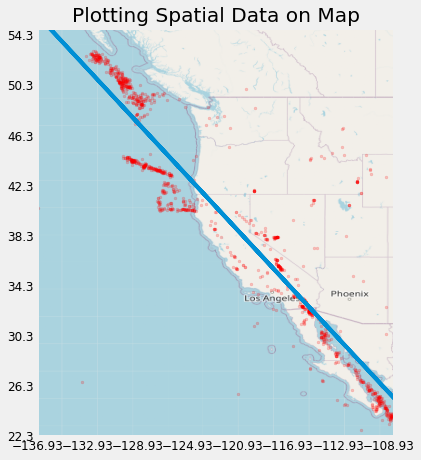

In [ ]:
# create bounds
#actual  map area bounding box
lonmin = -136.934
lonmax = -108.457
latmin = 22.294
latmax = 54.861
BBox = ((lonmin, lonmax, latmin, latmax))
# getting from data, this is slightly off for the map area we want to show
#BBox1 = ((longitude.min(), longitude.max(), latitude.min(), latitude.max()))

#create the plot of the map with data on top
fig = plt.figure(figsize = (8,7))
#ax = fig.gca()
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Plotting Spatial Data on Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(mapimage, zorder=0, extent = BBox, aspect= 'equal')
map = ax.imshow(mapimage, zorder=0, extent = BBox, aspect= 'equal')
ax.scatter(longitude, latitude, zorder=1, alpha= 0.2, c='r', s=8)

# add a grid
ax.grid()
goBy = 4

#arrage tick marks between lat and lon going by goBy
ticksLon = np.arange(latmin, latmax, goBy)
ticksLat = np.arange(lonmin, lonmax, goBy)
ax.set_xticks(ticksLat)

#ax.set_xticklabels([''])
ax.set_yticks(ticksLon)

# add the line of best fit
m, b = np.polyfit(new_data['longitude'], new_data['latitude'], 1)
plt.plot(new_data['longitude'], m*new_data['longitude'] + b)

#show the graph
plt.show()

**A little more data processing**

Split up the data into regions

In [ ]:
# add a new row that gives grid assignment to each row
# add new column
new_data['gridAssign'] = np.zeros(len(new_data))

# process long and lat into a grid assignment, this is slow O(m*n*o)
for row in range(len(new_data)):
  for i in range(len(ticksLon)):
    for j in range(len(ticksLat)):
      if new_data.at[row, 'latitude'] >= ticksLon[i]:
        if new_data.at[row, 'longitude'] >= ticksLat[j]:
          gridAssign = f'{j+1}{i+1}'
          new_data.at[row, 'gridAssign'] = int(gridAssign)

# change dtype of df for columns
new_data['gridAssign'] = new_data['gridAssign'].astype(int)
# Grids run from bottom to top and left to right counting from 1 to goBy + 1
# result is one number longitude (row) then latitude (column)

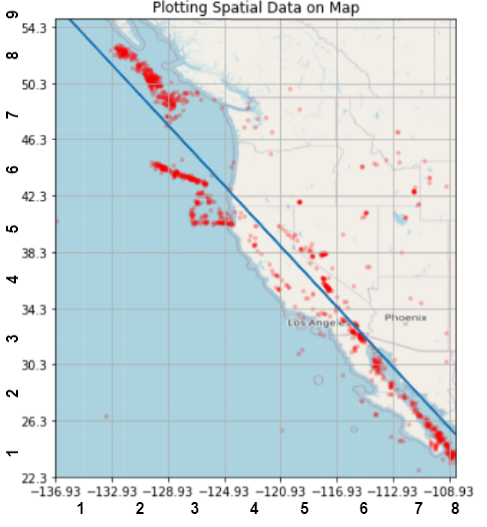

In [ ]:
gridSizeToDrop = 5
gridsToDrop = []
new_data['dateAlt'] = new_data['date']

Create time intervals based on region assignment

In [ ]:
new_data.groupby(['gridAssign']).count()

,time,latitude,longitude,depth,mag,date,dateAlt
gridAssign,,,,,,,
0,6,6,6,6,6,6,6
12,1,1,1,1,1,1,1
15,1,1,1,1,1,1,1
18,1,1,1,1,1,1,1
26,58,58,58,58,58,58,58
27,85,85,85,85,85,85,85
28,204,204,204,204,204,204,204
35,92,92,92,92,92,92,92
36,126,126,126,126,126,126,126


Create time intervals between earthquake occurences

In [ ]:
gridData = new_data['gridAssign']
gridData = gridData.drop_duplicates()
gridList = gridData.to_list()
from datetime import datetime

In [ ]:
# create a time interval between earthquakes in an area
# add new columns
new_data['timeIntervalGlobal'] = np.zeros(len(new_data))
new_data['timeIntervalGrid'] = np.zeros(len(new_data))

# time interval grid is time since last earthquake anywhere on the map (min)
for element in gridList: 
  currentGridDF = new_data.loc[new_data['gridAssign'] == element]
  currentGridData = currentGridDF.index.to_list()
  if len(currentGridData) <= gridSizeToDrop:
      gridsToDrop.append(element)
  else:
    for i in range(len(currentGridData)):
      # do the time interval, current - past
      if i != len(currentGridData) - 1:
        # calculate time difference
        dateNow = currentGridDF.at[currentGridData[i], 'date']
        timeNow = currentGridDF.at[currentGridData[i], 'time']
        now = datetime(int(dateNow[:4]), int(dateNow[5:7]), int(dateNow[8:]), int(timeNow[:2]), int(timeNow[3:5]), int(timeNow[6:8]), int(timeNow[9:]))
    
        # order of list is from most recent working back in history
        dateThen = currentGridDF.at[currentGridData[i + 1], 'date']
        timeThen = currentGridDF.at[currentGridData[i + 1], 'time']
        then = datetime(int(dateThen[:4]), int(dateThen[5:7]), int(dateThen[8:]), int(timeThen[:2]), int(timeThen[3:5]), int(timeThen[6:8]), int(timeThen[9:]))

        # calculate interval
        duration = now - then
        duration = duration.total_seconds()

        # change interval to minutes
        duration = duration / 60

        # reassign timeIntervalGrid to calculated time difference
        new_data.at[currentGridData[i], 'timeIntervalGrid'] = duration
      

      # if at the end, do the median of all in grid
      else:
        mediandf = new_data.groupby(['gridAssign']).median()
        median = mediandf.at[element, 'timeIntervalGrid']
        new_data.at[currentGridData[i], 'timeIntervalGrid'] = median
    

new_data['timeIntervalGrid'] = new_data['timeIntervalGrid'].round(2)


# time interval global is time since last earthquake in grid (min)
for i in range(len(new_data)):
  if i != len(new_data) - 1:
    # calculate time difference
    dateNow = new_data.at[i, 'date']
    timeNow = new_data.at[i, 'time']
    now = datetime(int(dateNow[:4]), int(dateNow[5:7]), int(dateNow[8:]), int(timeNow[:2]), int(timeNow[3:5]), int(timeNow[6:8]), int(timeNow[9:]))

    # order of list is from most recent working back in history
    dateThen = new_data.at[i + 1, 'date']
    timeThen = new_data.at[i + 1, 'time']
    then = datetime(int(dateThen[:4]), int(dateThen[5:7]), int(dateThen[8:]), int(timeThen[:2]), int(timeThen[3:5]), int(timeThen[6:8]), int(timeThen[9:]))

    # calculate interval
    duration = now - then
    duration = duration.total_seconds()

    # change interval to minutes
    duration = duration / 60

    # reassign timeIntervalGrid to calculated time difference
    new_data.at[i, 'timeIntervalGlobal'] = duration

# get rid of scientific notation
new_data['timeIntervalGlobal'] = new_data['timeIntervalGlobal'].round(2)

# make date into just year for new analysis
for i in range(len(new_data)):
  date = new_data.at[i, 'date']
  new_data.at[i, 'date'] = date[:4]

In [ ]:
new_data.head()
# grids that have a count less than 5 were not calculated and will be dropped later
# 1 is about 2 days
# 2 is about 216 days

,time,latitude,longitude,depth,mag,date,gridAssign,dateAlt,timeIntervalGlobal,timeIntervalGrid
0,20:18:26.857,30.677600,-112.807600,10.00,4.60,2021,73,2021-11-05,370.35,0.00
1,14:08:05.831,30.008700,-113.922300,10.00,4.50,2021,62,2021-11-05,2757.45,2757.45
2,16:10:38.716,29.961400,-113.685500,10.00,4.50,2021,62,2021-11-03,12508.05,311984.43
3,23:42:35.860,35.775833,-121.304333,7.79,4.65,2021,44,2021-10-25,2130.92,1067280.08
4,12:11:40.803,43.178800,-126.394500,10.00,4.70,2021,36,2021-10-24,47878.75,204043.48


In [ ]:
# Amy talks

Time series of earthquake intervals

No handles with labels found to put in legend.


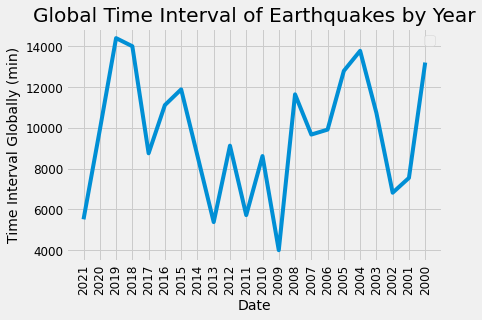

<Figure size 1280x800 with 0 Axes>

In [ ]:
# group data
dateTemp = new_data.groupby('date').mean()
intervalList = dateTemp['timeIntervalGlobal'].to_list()
dateList = new_data['date'].drop_duplicates().to_list()
averageMag = dateTemp['mag'].to_list()

# assign to arrays
dates = np.array(dateList)
returns = np.array(intervalList)

# Plot the entire data first
plt.plot(dates, returns)
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 90)
plt.xlabel('Date')
plt.ylabel('Time Interval Globally (min)')
plt.title('Global Time Interval of Earthquakes by Year')

plt.legend()
plt.figure(figsize=(16,10), dpi= 80)
plt.show()

# this is data for a model later
timeModelData = new_data

In [ ]:
# this shows the number of earthquakes total per year
new_data.groupby('date').count()['timeIntervalGlobal']

date
2000      5
2001     56
2002     35
2003     39
2004     60
2005     47
2006     44
2007     60
2008    101
2009     58
2010     87
2011     63
2012    133
2013     45
2014     55
2015     53
2016     41
2017     37
2018     48
2019     81
2020     70
2021     34
Name: timeIntervalGlobal, dtype: int64

In [ ]:
# now we can drop date and time
new_data = new_data.drop(labels=['date'], axis=1)
new_data = new_data.drop(labels=['time'], axis=1)
new_data = new_data.drop(labels=['dateAlt'], axis=1)

Distribution of Earthquakes

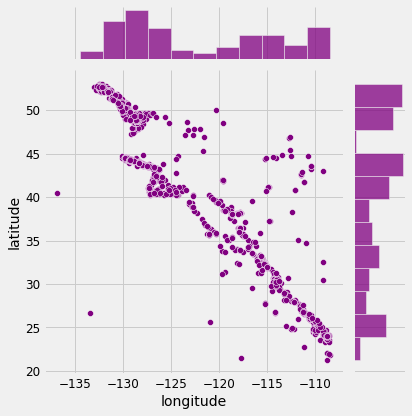

In [ ]:
# this is the same plot
sns.jointplot(data=new_data, x="longitude", y="latitude", color="purple")

Distribution of our data. It's 3D and interactive! Move it around!


In [ ]:
# this creates 3d interactive view of data. X is long, Y is lat, Z is depth (down), color based on mag
fig = px.scatter_3d(new_data, x=new_data['longitude'], y=new_data['latitude'], z=new_data['depth'], color='mag', opacity=0.9)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()
# biggest in 2018 was 8 in alaska 47km 29mi

Outliers

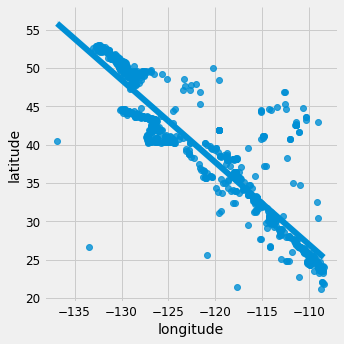

In [ ]:
# linear model plot shows outliers in top right and bottom left corners
sns.lmplot(x='longitude',y='latitude',data=new_data)

In [ ]:
new_data.describe()
# outliers in depth, 

,latitude,longitude,depth,mag,gridAssign,timeIntervalGlobal,timeIntervalGrid
count,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1.252000e+03
mean,39.973934,-122.114078,10.392562,4.966254,46.278754,8805.530232,1.780648e+05
std,9.099780,7.850008,5.486388,0.482732,17.682060,13471.542936,4.168982e+05
min,21.210000,-136.857500,-2.261000,4.500000,0.000000,0.000000,0.000000e+00
25%,32.390292,-129.246775,10.000000,4.600000,28.000000,126.220000,1.156475e+02
50%,41.143783,-125.265333,10.000000,4.800000,37.000000,2791.640000,1.923450e+04
75%,49.026500,-115.177875,10.000000,5.200000,63.000000,12778.017500,1.807889e+05
max,53.011000,-108.475000,76.200000,7.800000,81.000000,112553.970000,6.072778e+06


In [ ]:
# append gridsToDrop to include data in Yellowstone, so we're excluding hotspot info
gridsToDrop.append(66)
gridsToDrop.append(76)
gridsToDrop.append(65)
gridsToDrop.append(47)
gridsToDrop.append(0)
print(gridsToDrop, end=' ')

[73, 75, 46, 15, 77, 51, 74, 12, 18, 61, 57, 38, 66, 76, 65, 47, 0] 

In [ ]:
#remove outliers of depth greater than 30, also removes any data found in gridOutliers
for i in range(len(new_data)):
  if new_data.at[i,'depth'] >= 30 or new_data.at[i,'gridAssign'] in gridsToDrop:
    new_data = new_data.drop([i])

In [ ]:
new_data.describe()

,latitude,longitude,depth,mag,gridAssign,timeIntervalGlobal,timeIntervalGrid
count,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1.182000e+03
mean,39.961760,-122.500133,10.142501,4.971506,45.601523,8636.022614,1.494440e+05
std,9.162423,7.756772,4.253547,0.484567,17.064437,13376.338428,3.017181e+05
min,22.772000,-132.794000,-2.261000,4.500000,26.000000,0.000000,0.000000e+00
25%,32.332333,-129.349725,10.000000,4.600000,28.000000,111.135000,1.437275e+02
50%,41.007550,-126.222300,10.000000,4.805000,37.000000,2759.000000,2.026429e+04
75%,49.149250,-115.332083,10.000000,5.200000,63.000000,12050.105000,1.667938e+05
max,53.011000,-108.483000,29.850000,7.800000,81.000000,112553.970000,3.396389e+06


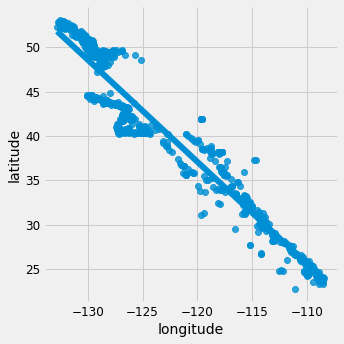

In [ ]:
sns.lmplot(x='longitude',y='latitude',data=new_data)

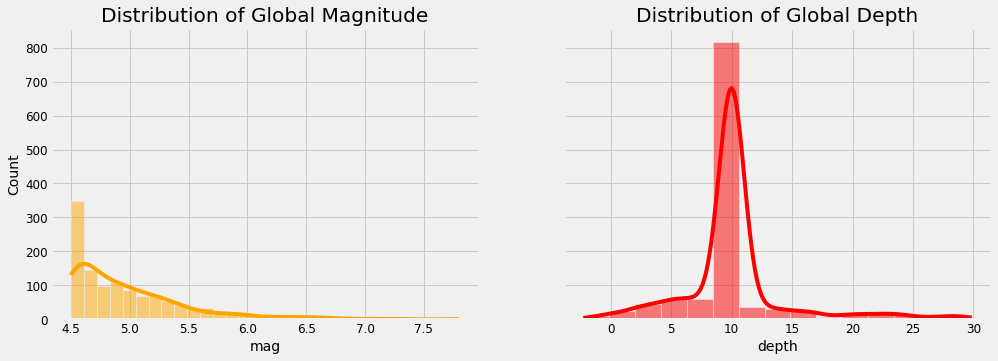

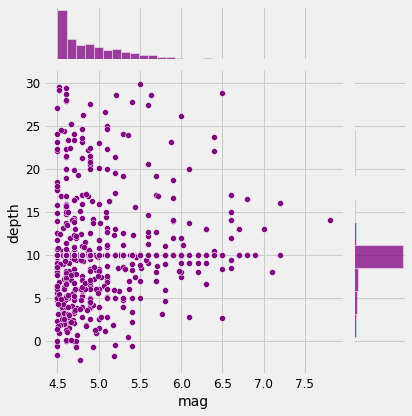

In [ ]:
#subplot
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

#distribution of mag
sns.histplot(new_data, x="mag", bins=30, ax = axes[0], kde=True, color='orange')
axes[0].set_title('Distribution of Global Magnitude')

# distribution of depth
sns.histplot(new_data, x="depth", bins=15, ax = axes[1], kde=True, color='red')
axes[1].set_title('Distribution of Global Depth')

# distribution of magnitude compared to depth
magvsdepth = sns.jointplot(data=new_data, x="mag", y="depth", color='purple')

Text(0.5, 1.0, 'Distribution of Earthquakes per Grid Assignment')

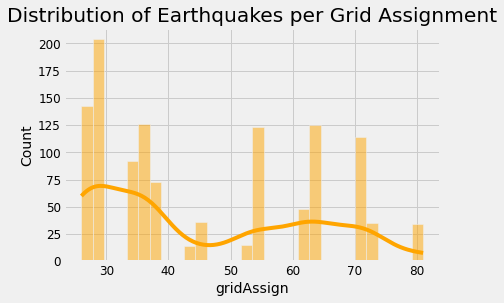

In [ ]:
hist1 = sns.histplot(new_data, x="gridAssign", bins=30, kde=True, color='orange')
hist1.set_title('Distribution of Earthquakes per Grid Assignment')
# how many earthquakes happen visually per grid

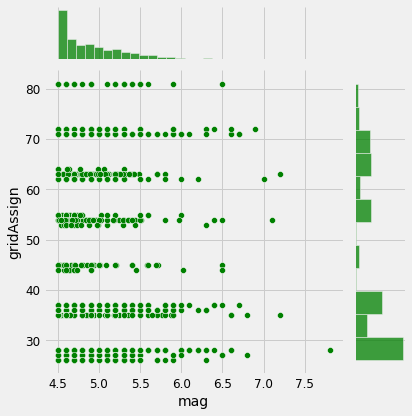

In [ ]:
sns.jointplot(data=new_data, x="mag", y="gridAssign", color='green')
# what is the magnitude per grid

In [ ]:
# Ryan talks

Insights From Time Intervals

In [ ]:
gridAverage = new_data.groupby('gridAssign').mean()
gridAverage = gridAverage['timeIntervalGrid'].round(2)
countPerGrid = new_data.groupby('gridAssign').count()
countPerGrid = countPerGrid['timeIntervalGrid']
averageMag = new_data.groupby('gridAssign').mean()
averageMag = averageMag['mag']
averageDepth = new_data.groupby('gridAssign').mean()
averageDepth = averageDepth['depth']
tempD = {'gridAverageTime': gridAverage, 'count': countPerGrid, 'averageMag': averageMag, 'averageDepth': averageDepth}
pd.DataFrame(data=tempD)
# earthquakes of concern averages

,gridAverageTime,count,averageMag,averageDepth
gridAssign,,,,
26,163632.68,58,5.058621,10.000000
27,128190.14,85,4.961176,10.077647
28,51823.22,204,4.941176,11.268824
35,117757.37,92,5.006087,12.379772
36,87661.36,126,4.983333,10.605079
37,139535.67,73,5.010959,11.473603
44,786689.28,14,4.956429,7.594571
45,265552.62,36,4.957778,13.264167
53,722527.89,15,4.944667,10.313267


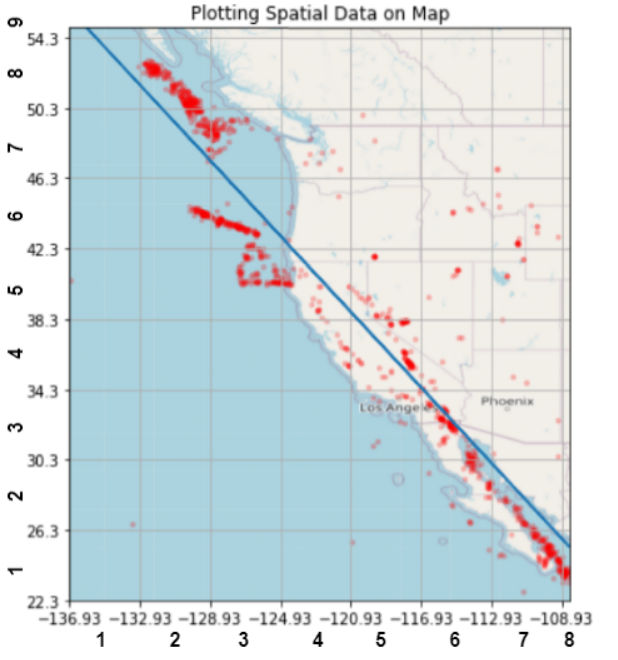

In [ ]:
new_data['timeIntervalGlobal'].mean()
# about every 6 days

8636.022614213205

In [ ]:
new_data['mag'].mean()
# average magnitude

4.971505922165816

Correlations

In [ ]:
new_data.corr()

,latitude,longitude,depth,mag,gridAssign,timeIntervalGlobal,timeIntervalGrid
latitude,1.000000,-0.973000,0.136814,-0.031270,-0.949646,0.000011,-0.130815
longitude,-0.973000,1.000000,-0.173804,0.018492,0.984536,-0.005577,0.126732
depth,0.136814,-0.173804,1.000000,0.092241,-0.163309,0.013417,-0.005298
mag,-0.031270,0.018492,0.092241,1.000000,0.015592,-0.012845,0.049216
gridAssign,-0.949646,0.984536,-0.163309,0.015592,1.000000,-0.007775,0.130352
timeIntervalGlobal,0.000011,-0.005577,0.013417,-0.012845,-0.007775,1.000000,0.260549
timeIntervalGrid,-0.130815,0.126732,-0.005298,0.049216,0.130352,0.260549,1.000000


In [ ]:
# make latitude and longitude into one variable 
x = new_data['latitude']
y = new_data['longitude']
minx = new_data['latitude'].min()
miny = new_data['longitude'].min()

In [ ]:
# suggested by Prof. Downey to reduce dimensionality and correlation
newCol = (np.sqrt((x**2)+(y**2))) / (np.sqrt(((x - minx)**2) + ((y - miny)**2)))
new_data['longLat'] = newCol
new_data_withLonLat = new_data
new_data.head()

,latitude,longitude,depth,mag,gridAssign,timeIntervalGlobal,timeIntervalGrid,longLat
1,30.008700,-113.922300,10.00,4.50,62,2757.45,2757.45,5.828735
2,29.961400,-113.685500,10.00,4.50,62,12508.05,311984.43,5.758525
3,35.775833,-121.304333,7.79,4.65,44,2130.92,1067280.08,7.288250
4,43.178800,-126.394500,10.00,4.70,36,47878.75,204043.48,6.245300
5,48.763400,-129.086500,10.00,4.50,27,29571.77,505165.38,5.255856


In [ ]:
new_data = new_data.drop(labels=['longitude'], axis=1)
new_data = new_data.drop(labels=['latitude'], axis=1)
new_data_nonNormalize = new_data
new_data = new_data_nonNormalize
new_data.corr()

,depth,mag,gridAssign,timeIntervalGlobal,timeIntervalGrid,longLat
depth,1.000000,0.092241,-0.163309,0.013417,-0.005298,-0.056371
mag,0.092241,1.000000,0.015592,-0.012845,0.049216,-0.027999
gridAssign,-0.163309,0.015592,1.000000,-0.007775,0.130352,-0.079819
timeIntervalGlobal,0.013417,-0.012845,-0.007775,1.000000,0.260549,0.075986
timeIntervalGrid,-0.005298,0.049216,0.130352,0.260549,1.000000,0.135015
longLat,-0.056371,-0.027999,-0.079819,0.075986,0.135015,1.000000


In [ ]:
new_data.head()

,depth,mag,gridAssign,timeIntervalGlobal,timeIntervalGrid,longLat
1,10.00,4.50,62,2757.45,2757.45,5.828735
2,10.00,4.50,62,12508.05,311984.43,5.758525
3,7.79,4.65,44,2130.92,1067280.08,7.288250
4,10.00,4.70,36,47878.75,204043.48,6.245300
5,10.00,4.50,27,29571.77,505165.38,5.255856


Normalizing Data

In [ ]:
from sklearn import preprocessing
colToNormalize = ['timeIntervalGlobal', 'timeIntervalGrid']

for item in colToNormalize:
  x = np.array(new_data[item].to_list())
  x = x.reshape(-1,1)
  X_scaler = preprocessing.StandardScaler().fit(x)
  x = X_scaler.transform(x)
  new_data[item] = x

new_data_normalize = new_data

In [ ]:
new_data.head()

,depth,mag,gridAssign,timeIntervalGlobal,timeIntervalGrid,longLat
1,10.00,4.50,62,-0.439661,-0.486377,5.828735
2,10.00,4.50,62,0.289591,0.538944,5.758525
3,7.79,4.65,44,-0.486520,3.043319,7.288250
4,10.00,4.70,36,2.934984,0.181038,6.245300
5,10.00,4.50,27,1.565795,1.179485,5.255856


## **Split Data for Modeling**

Split into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.metrics import r2_score

In [ ]:
# each split will be done per model as each model is built to predict something different

In [ ]:
# alternate split used to not shuffle the data
#X_train, X_test, y_train, y_test = train_test_split(df_feat, df_target, random_state=50, shuffle = False, stratify = None)

###**5. Building A Model and Evaluate**

**Linear Regression**

In [ ]:
# Amy talks

In [ ]:
# This model is used for predictive analysis per grid. 
# Below is an example of how well we can predict time interval for grid 28 given other variables

Split the data

In [ ]:
# pick a grid
gridToAnalyze = 28

linear_data = new_data[new_data['gridAssign'] == gridToAnalyze]

targetCol = 'timeIntervalGrid'

# define the target 
linear_target = pd.DataFrame(linear_data[targetCol], columns=[targetCol])

# define the features
linear_feat = linear_data.drop(labels=[targetCol], axis=1)

Xlin_train, Xlin_test, ylin_train, ylin_test = train_test_split(linear_feat, linear_target, test_size=0.33, random_state=50)

Build the model

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(Xlin_train, ylin_train)
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [[0.00789784 0.16542814 0.         0.14679424 0.43448258]]


In [ ]:
predictions = lm.predict(Xlin_test)

Plot the predictions

Text(0, 0.5, 'Predicted Y')

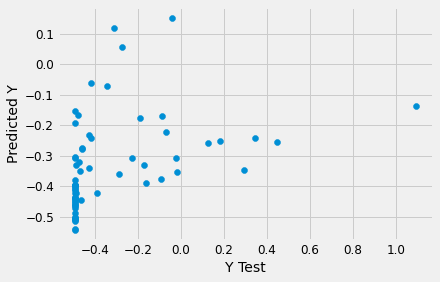

In [ ]:
linRegPlt = plt.scatter(ylin_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
# predictions look odd because of normalizations

Evaluate

In [ ]:
# MAE is measure of errors between paired observations expressing the same phenomenon, should be low
print('MAE:', metrics.mean_absolute_error(ylin_test, predictions))
# MSE is the average squared difference between the estimated values and the actual value, should be low
print('MSE:', metrics.mean_squared_error(ylin_test, predictions))
# RMSE is standard deviation of the residuals, should be low
print('RMSE:', np.sqrt(metrics.mean_squared_error(ylin_test, predictions)))
# R-squared is proportion of the variance in the dependent variable that is predictable from the independent variable(s), between 0-100%, should be high
print('R-squared:', r2_score(ylin_test,predictions))
regressionResults = [r2_score(ylin_test,predictions), metrics.mean_absolute_error(ylin_test, predictions), metrics.mean_squared_error(ylin_test, predictions), np.sqrt(metrics.mean_squared_error(ylin_test, predictions))]

MAE: 0.16859763142951065
MSE: 0.0695193033633854
RMSE: 0.2636651349029397
R-squared: 0.16348287147811325


In [ ]:
# model is about 16% accurate

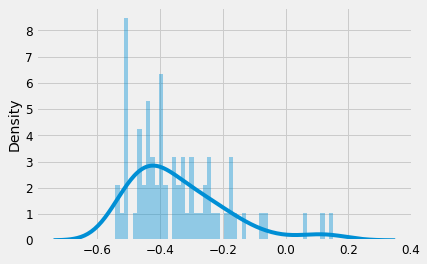

In [ ]:
sns.distplot((predictions),bins=50);
# residuals are difference between the observed value and the mean value that the model predicts for that observation

In [ ]:
# this is not classification so we can't do a confusion matrix

In [ ]:
# We likely need more data, probably also data under 4.5 magnitude to see if that is related

**K-nearest neighbor**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
numGrids = new_data.nunique()
numGrids = numGrids['gridAssign']
# numGrids is how many grids we are using, in this case 17

knn = KNeighborsClassifier(n_neighbors=numGrids)
# this model can be used to see how well each grid can be classified given an earthquake occurence
# this will show if a grid has unique earthquakes that can even be used for a prediction model

Split the data

In [ ]:
model_data = new_data

targetCol = 'gridAssign'

# define the target 
df_target = pd.DataFrame(model_data[targetCol], columns=[targetCol])

# define the features
df_feat = model_data.drop(labels=[targetCol], axis=1)

X_train, X_test, y_train, y_test = train_test_split(df_feat, df_target, test_size=0.33, random_state=50)

Build the model

In [ ]:
knn.fit(X_train,y_train.values.ravel())
knnPred = knn.predict(X_test)

In [ ]:
# don't really need elbow, we will see results of other k's later

Evalutaion

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, knnPred))

Accuracy: 0.4117647058823529


In [ ]:
# accuracy if 45% so earthquakes are not necessarily unique to a certain grid 

In [ ]:
print(classification_report(y_test,knnPred))
# precision is ability of a classification model to identify only the relevant data points
# recall is ability of a model to find all the relevant cases within a data set
# f1-score is wheighted average of precision and recall, taks both FP and FN in account

              precision    recall  f1-score   support

          26       0.18      0.19      0.18        16
          27       0.39      0.41      0.40        29
          28       0.54      0.85      0.66        78
          35       0.62      0.56      0.59        27
          36       0.46      0.80      0.59        41
          37       0.40      0.08      0.13        25
          44       1.00      0.10      0.18        10
          45       0.00      0.00      0.00        11
          53       0.00      0.00      0.00         4
          54       0.21      0.52      0.30        23
          55       0.00      0.00      0.00        14
          62       0.17      0.07      0.10        14
          63       0.34      0.28      0.31        39
          64       0.00      0.00      0.00         3
          71       0.18      0.09      0.12        33
          72       0.17      0.08      0.11        12
          81       1.00      0.08      0.15        12

    accuracy              

What about a different number of k

In [ ]:
# let's try other numbers of k
numberKToTry = numGrids

for i in range(1, numberKToTry + 1):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train.values.ravel())
  knnPred = knn.predict(X_test)
  print(f"Accuracy of k = {i}: {metrics.accuracy_score(y_test, knnPred)}")

Accuracy of k = 1: 0.46547314578005117
Accuracy of k = 2: 0.44501278772378516
Accuracy of k = 3: 0.45268542199488493
Accuracy of k = 4: 0.45012787723785164
Accuracy of k = 5: 0.4475703324808184
Accuracy of k = 6: 0.4475703324808184
Accuracy of k = 7: 0.45524296675191817
Accuracy of k = 8: 0.45524296675191817
Accuracy of k = 9: 0.4398976982097187
Accuracy of k = 10: 0.4398976982097187
Accuracy of k = 11: 0.4373401534526854
Accuracy of k = 12: 0.4398976982097187
Accuracy of k = 13: 0.43478260869565216
Accuracy of k = 14: 0.4219948849104859
Accuracy of k = 15: 0.41687979539641945
Accuracy of k = 16: 0.4117647058823529
Accuracy of k = 17: 0.4117647058823529


In [ ]:
# this shows that maybe the earthquakes are related in larger areas
# k=1 was the highest so the earthquakes are likely all relative to each other in the map
# maybe we need more data (earthquakes less than 4.5)

In [ ]:
# we also tried a forecast model to tell forecasted magnitudes, but couldn't quite make it work

**Which model was the best**

In [ ]:
# Amy talks

In [ ]:
# explain which model performed best or was most helpful / insightful

Both models were insightful for our analysis. In linear regression we found that with our current data, it is difficult to do an earthquake analysis. The KNN found something similar, which hints that earthquake prediction is quite difficult and may not be easy to make an accurate model. The best results we got were from our EDA analysis and averages per grid.

###**7. Summary and Deployment**

In [ ]:
# answer each question and explain the importance of this model and importance of the results

**How will the business use this in learning?**

Business can use this learning to understand the patterns/trends of earthquake based on previously recorded data, and possibly predict when the next earthquake will occur. It is helpful interms of preperation and early awareness.

**Who will use this learning?**

Big organization like hospitals, federal government and various private and public companies will utilize this data to provide saftey and emergency preparedness lessons for their communities. 

**How will the information be deployed for use?**

This can be deployed to the general public as well through online applications for warning of possible earthquakes and stats about local earthquake dangers

**What improvements can be made?**

There are so many variables to earthquakes that it may be really difficult or impossible to accurately predict an earthquake or its magitude. The insights we discovered about averages per grid for time and occurence of an earthquake of damaging magnitude were definitely the best results to come out of this project. Now we can statistically see what the probabilities of dangers are. I would be curious to see if the inlusion of earthquakes magnitude *less* than 4.5 are significant in the prediction models. Maybe getting rid of some depth outliers also made the model worse. There are likely other variables that are necessary such as relative movement of plates where earthquake occured, maybe if we somehow adjusted for the errors, or something else entirely. Also get the forecast model working to better predict magnitudes in the future. Could even use it for rare event distribution to predict major earthquakes